# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 13 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 10:30
* Hora final : 11:00
* Filamento extruido: 447cm 
* $T: 150ºC$
* $V_{min} tractora: 1.5 mm/s$
* $V_{max} tractora: 3.4 mm/s$
* Los incrementos de velocidades en las reglas del sistema experto son distintas:
    * En los caso 3 y 5 se mantiene un incremento de +2.
    * En los casos 4 y 6 se reduce el incremento a -1.

In [1]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [3]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('ensayo1.CSV')

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y', 'RPM TRAC']

In [6]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y,RPM TRAC
count,1125.000000,1125.000000,1125.000000
mean,1.715315,1.723081,2.449800
std,0.232539,0.240764,0.882116
min,1.011880,1.000236,1.497500
25%,1.516554,1.517422,1.497500
50%,1.723012,1.712803,2.387500
75%,1.883591,1.908185,3.500000
max,2.307976,2.344920,3.500000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

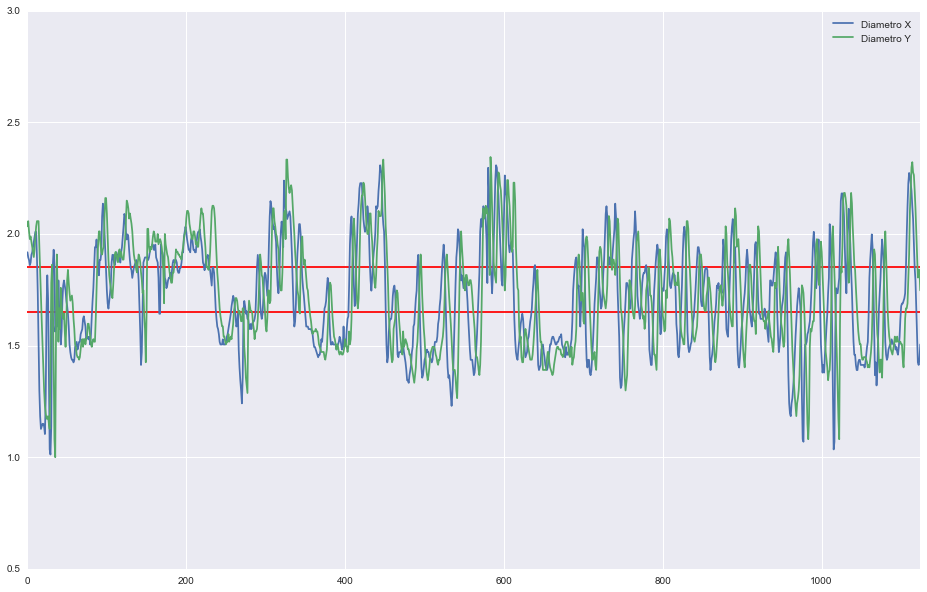

In [7]:
datos.ix[:, "Diametro X":"Diametro Y"].plot(figsize=(16,10),ylim=(0.5,3)).hlines([1.85,1.65],0,3500,colors='r')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

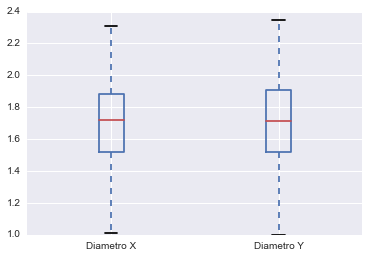

In [8]:
datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

Con esta segunda aproximación se ha conseguido estabilizar los datos. Se va a tratar de bajar ese porcentaje. Como cuarta  aproximación, vamos a  modificar las velocidades de tracción. El rango de velocidades propuesto es de 1.5 a 5.3, manteniendo los incrementos del sistema experto como en el actual ensayo.

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

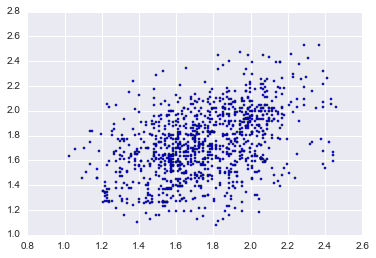

In [38]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [39]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [40]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

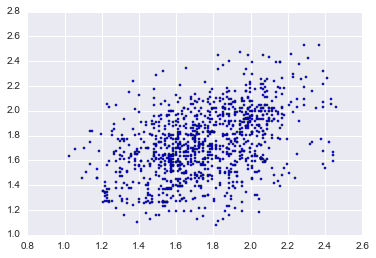

In [41]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [42]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1114.000000
mean        1.027120
std         0.177696
min         0.597692
25%         0.912259
50%         1.006821
75%         1.123901
max         1.726313
dtype: float64

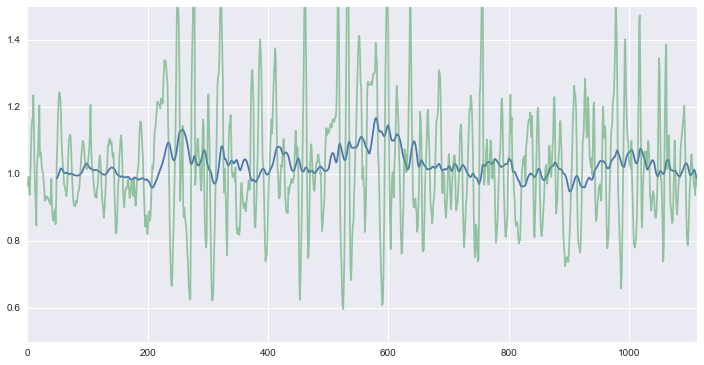

In [43]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [44]:
Th_u = 1.85
Th_d = 1.65

In [45]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [46]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,1020.000000,1020.000000,1020.000000,1020.000000,1020,1020,1020,1020.000000
mean,66.109804,151.083725,1.749832,1.726640,1,1,0,2.551975
std,0.159864,0.725026,0.277519,0.281122,0,0,0,0.878147
min,65.800000,149.700000,1.023350,1.080687,True,True,0,1.497500
25%,66.000000,150.500000,1.550964,1.528915,1,1,0,1.497500
50%,66.000000,151.100000,1.734482,1.701310,1,1,0,2.610000
75%,66.300000,151.600000,1.975350,1.942664,1,1,0,3.500000
max,66.500000,152.600000,2.457085,2.528808,True,True,0,3.500000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0542CBB0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0F8C3BF0>], dtype=object)

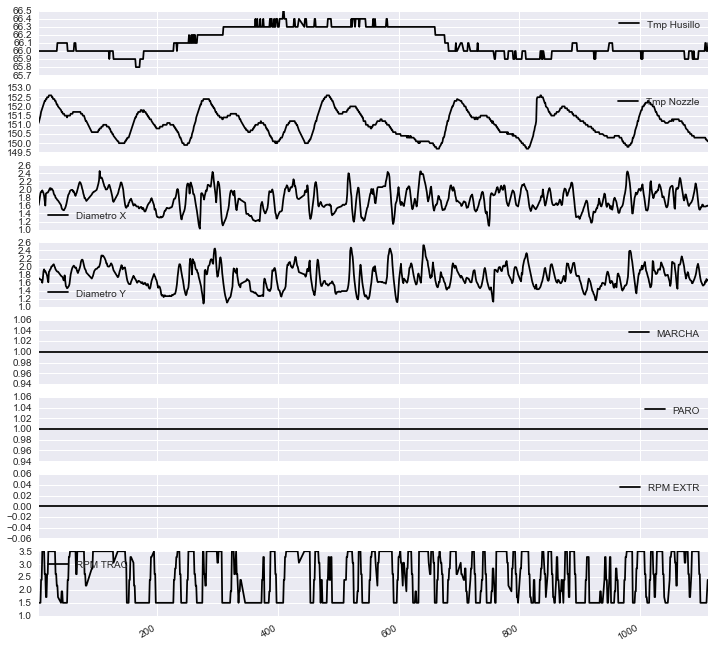

In [47]:
data_violations.plot(subplots=True, figsize=(12,12))